In [8]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 


     -------------------------------------- 455.9/455.9 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.1 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 6.8 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 781.

In [98]:
from tensorflow.keras import utils
data_dir = "C:/Users/Hunter/Downloads/train"
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.5,
  subset="training",
  seed=123,
  image_size=(299, 299),
  batch_size=batch_size)

Found 23998 files belonging to 2 classes.
Using 11999 files for training.


In [99]:
data_dir = "C:/Users/Hunter/Downloads/test1"
batch_size = 32
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(299, 299),
  batch_size=batch_size)

Found 1002 files belonging to 2 classes.
Using 200 files for validation.


In [100]:
model = tf.keras.models.Sequential([

tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(512, activation='relu'),

tf.keras.layers.Dense(1, activation='sigmoid')])


In [85]:
model.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.RMSprop(),
metrics='accuracy')

In [90]:
history = model.fit(train_ds,
steps_per_epoch=8,
epochs=10,
verbose=1,
validation_data = val_ds,
validation_steps=8 )

Epoch 1/10
8/8 [==============================] - 5s 605ms/step - loss: 0.6774 - accuracy: 0.5547
Epoch 2/10
8/8 [==============================] - 5s 612ms/step - loss: 0.7343 - accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 5s 648ms/step - loss: 0.6819 - accuracy: 0.5508
Epoch 4/10
8/8 [==============================] - 5s 635ms/step - loss: 0.6932 - accuracy: 0.5078
Epoch 5/10
8/8 [==============================] - 5s 594ms/step - loss: 0.7579 - accuracy: 0.5312
Epoch 6/10
8/8 [==============================] - 5s 641ms/step - loss: 0.9539 - accuracy: 0.4805
Epoch 7/10
8/8 [==============================] - 5s 636ms/step - loss: 0.6844 - accuracy: 0.5117
Epoch 8/10
8/8 [==============================] - 8s 953ms/step - loss: 0.7124 - accuracy: 0.5039
Epoch 9/10
8/8 [==============================] - 6s 719ms/step - loss: 0.7249 - accuracy: 0.5312
Epoch 10/10
8/8 [==============================] - 6s 783ms/step - loss: 0.7834 - accuracy: 0.5469


In [103]:
model = keras.applications.InceptionV3(include_top=True)
model.trainable=False

tmp=model.layers[-2].output

model = keras.Model(model.layers[0].input,layers.Dense(2)(tmp))
model.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.RMSprop(),
metrics='accuracy')

In [108]:
history=model.fit(
    train_ds,
    epochs=2 , 
    steps_per_epoch=30,

    validation_data=val_ds)

Epoch 1/2
30/30 [==============================] - 97s 3s/step - loss: 7.4181 - accuracy: 0.4885 - val_loss: 8.6158 - val_accuracy: 0.5650
Epoch 2/2
30/30 [==============================] - 95s 3s/step - loss: 7.2434 - accuracy: 0.4771 - val_loss: 8.6158 - val_accuracy: 0.5650


In [27]:
model.save('model.h5')

In [91]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
input= load_img('C:/Users/Hunter/Downloads/pruebas/50.jpg', target_size=(299, 299))
im= np.array(input)
im= im/ 255.0
im= im.reshape(1,200,200,3)
predict= model.predict(im)
predict

1/1 [==============================] - 0s 101ms/step


array([[0.5075653]], dtype=float32)

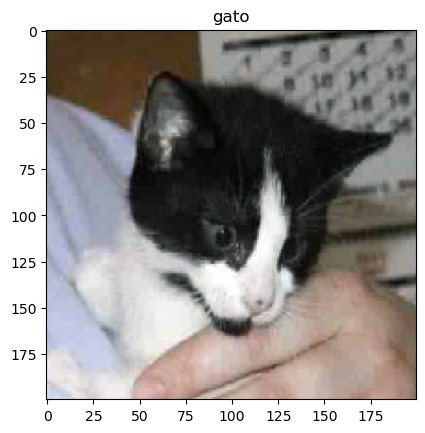

In [92]:
import matplotlib.pyplot as plt
plt.imshow(input)
if (predict[0]<50):
    plt.title("gato")
else:
    plt.title("perro")